# Unsupervised Learning

In unsupevise learning, there is no known output, no teacher to instruct the learning algorithm

# Types of unsupervised Learning

We will look here two types of unsupervised learning, namely, transformations of the data and clustering.

## Unsupervised transfromations

## Clustering algorithms

Clustering algorithms includes the partition of data into distinct groups of similar items.

# Preprocessing: Transformations and Scaling of data

StandardScalar
RobustScalar
MinMaxScalar
Normalizer

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

print("Data shape: {}".format(cancer.data.shape))
print("Target shape: {}".format(cancer.target.shape))

Data shape: (569, 30)
Target shape: (569,)


In [4]:
print("Keys:{}".format(cancer.keys()))

Keys:dict_keys(['target', 'feature_names', 'DESCR', 'filename', 'target_names', 'data'])


In [5]:
print("Descriptions:\n{}".format(cancer.DESCR))

Descriptions:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is 

In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=1)

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (426, 30)
X_test shape: (143, 30)
y_train shape: (426,)
y_test shape: (143,)


# Preprocessing

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
# transform data
X_train_scaled = scaler.transform(X_train)


In [12]:
# transform test data
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.datasets import make_blobs
#make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

In [14]:
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

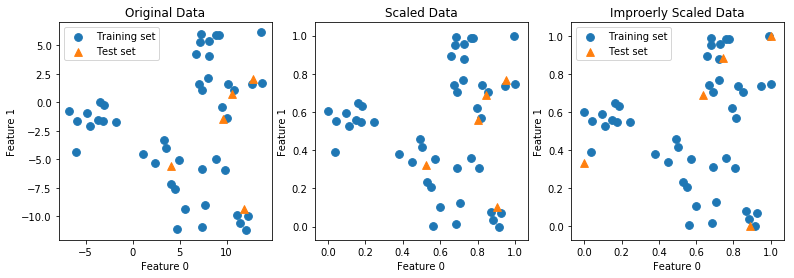

In [22]:
# plot the training and test sets
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(1,3, figsize=(13,4)) #1 row, 3 cols

axes[0].scatter(X_train[:,0], X_train[:,1], label="Training set", s=60)
axes[0].scatter(X_test[:,0], X_test[:,1], label="Test set", s=60, marker='^')
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")


# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:,0], X_train_scaled[:,1], label="Training set", s=60)
axes[1].scatter(X_test_scaled[:,0], X_test_scaled[:,1], label="Test set", s=60, marker='^')
axes[1].set_title("Scaled Data")

test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:,0], X_train_scaled[:,1], label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:,0], X_test_scaled_badly[:,1], label="Test set", s=60, marker='^')
axes[2].legend(loc='upper left')
axes[2].set_title("Improerly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    

In [23]:
from sklearn.svm import SVC

In [27]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

svm = SVC(C=100, gamma='auto')
svm.fit(X_train,y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test,y_test)))

Test set accuracy: 0.63


In [28]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm.fit(X_train_scaled, y_train)

print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled,y_test)))



Test set accuracy: 0.97


In [30]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled, y_train)

print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled,y_test)))



Test set accuracy: 0.96


# Dimensionality Reduction, Feature Extraction, and Manifold Learning

# Principal Component Analysis (PCA)
